# <center> **Итоговый проект (PJ-04)**

# <center> Особенности клиентов спортзала и отток

# <center> (Особенности поведения клиентов для прогнозирования оттока и определения скорости оттока)

## Постановка задачи

<center> <img src=https://www.logolynx.com/images/logolynx/89/89c83058402dc797f8b4953fc4617bca.jpeg align="right" width="300"/> </center>

Сеть фитнес-центров в США разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент ушёл? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно. Индикаторы оттока зависят от специфики отрасли. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он может вернуться или находится в отпуске. Однако чаще бывает наоборот. Чтобы бороться с оттоком сеть фитнес-центров предоставила базу своих клиентов в электронном виде. Задача — провести анализ и подготовить план действий по удержанию клиентов.

**Бизнес-задача:** необходимо реализовать эффективную стратегию удержания клиентов посредством анализа данных.

**Техническая задача для вас как для специалиста в Data Science:** спрогнозировать вероятность оттока клиентов на следующий месяц, определить ключевые профили клиентов и разработать конкретные рекомендации по улучшению удержания и удовлетворенности клиентов. Это позволит оптимизировать клиентский опыт и укрепить их лояльность.

**Основные цели проекта:**
1. Произвести обработку исходного набора данных.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого каждой группы клиентов.
4. Построить модель машинного обучения, решающую задачу кластеризации.
5. Выработать возможные рекомендации по улучшению удержания клиентов.

## Данные и их описание

**Данные о клиентах сети фитнес-центров:**

* 'gender' - пол;
* 'Near_Location' - бинарный признак о месте жительства или работы клиента, где расположен спортзал;
* 'Partner' - если пользователь работает в ассоциированной компании (у спортзала есть ассоциированные компании, сотрудники которых получают скидки; в этих случаях спортзал хранит информацию о работодателях клиентов), бинарный признак;
* 'Promo_friends' - если пользователь изначально зарегистрировался по предложению «приведи друга» (он использовал промокод друга при оплате первой подписки), бинарный признак;
* 'Phone' - если пользователь предоставил свой номер телефона при регистрации (бинарный признак);
* 'Contract_period' - длительность текущего действующего абонемента;
* 'Group_visits' - если клиент посещает групповые тренировки (бинарный признак);
* 'Age' - возраст клиента;
* 'Avg_additional_charges_total' - суммарная выручка от других услуг фитнес-центра;
* 'Month_to_end_contract' - срок до окончания текущего действующего абонемента (в месяцах);
* 'Lifetime' - время (в месяцах) с момента первого посещения пользователем спортзала;
* 'Avg_class_frequency_total' - коэффициент средней частоты посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' - коэффициент средней частоты посещений в неделю за предыдущий месяц;
* 'Churn' - факт оттока клиента (бинарный признак).

## 1. Знакомство со структурой данных

### Чтение данных

In [1]:
import pandas as pd
data = pd.read_csv('data/gym_churn_us.csv', sep = ',')
data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


### Анализ типа данных

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### Описательная статистика данных

In [3]:
data.describe().round(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.00,4000.00,4000.00,4000.00,4000.0,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.9,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.3,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.0,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.0,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.0,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.0,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.0,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


### Поиск пропусков в данных

In [4]:
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

**Пропусков нет**

### Поиск дубликатов данных

In [5]:
data.duplicated().sum()

0

**Дубликаты отсутствуют**

### **Вывод:**

Данные для анализа содержат 14 строк с 4000 записей; данные о характеристиках (особенностях) и оттоке для 4000 уникальных пользователей.

Данные не содержат пропущенных значений или дубликатов.

## 2. Разведывательный анализ

Средние значения признаков в двух группах — тех, кто ушел и тех, кто остался

In [6]:
df_1 = data.groupby('Churn').mean()
df_2 = df_1.transpose().round(2)
df_2

Churn,0,1
gender,0.51,0.51
Near_Location,0.87,0.77
Partner,0.53,0.36
Promo_friends,0.35,0.18
Phone,0.90,0.90
Contract_period,5.75,1.73
Group_visits,0.46,0.27
Age,29.98,26.99
Avg_additional_charges_total,158.45,115.08
Month_to_end_contract,5.28,1.66


* 'gender' - примерно одинаковые значения и у оставшихся и у ушедших клиентов, соответственно пол не влияет на отток клиентов;
* 'Near_Location' - в обоих случаях высокое значение, что означает, что большая часть и ушедших, и оставшихся клиентов живет поблизости от фитнес-центра разница небольшая, вероятно, что этот признак не влияет на отток клиентов, но при этом чаще уходят те, кто живет дальше;
* 'Partner' - клиенты, которые работают в ассоциированной компании (партнёрах сети фитнес-центров) уходят реже;
* 'Promo_friends' - аналогичная ситуация, клиенты, пришедшие по промокоду уходят реже;
* 'Phone' - высокий показатель в обеих группах клиентов, этот признак не влияет на отток;
* 'Contract_period' - клиенты, которые оформляют короткие абонементы (1-6 месяцев), склонны уходить чаще;
* 'Group_visits' - клиенты, посещающие групповые тренировки уходят реже;
* 'Age' - признак возраста не влияет на оттток клиентов, для обучения модели возможно создать признак возрастных групп;
* 'Avg_additional_charges_total' - rkbtyns чаще остаются в фитнес-клубе, если они пользуются другими услугами;
* 'Month_to_end_contract' - rkbtyns yt уходzn из фитнес-клуба, если их абонемент не закончен;
* 'Lifetime' - очень сильное положительное влияние и это логично, чем дольше клиент занимается в одном конкретном фитнес-клубе, тем меньше вероятность, что он оттуда уйдёт;
* 'Avg_class_frequency_total' - есть небольшая зависимость, у части клиентов, которая уходит в среднем посещают фитнес-центр 1 раз в неделю;
* 'Avg_class_frequency_current_month' - здесь разница еще заметнее, т.е. те, кто ушли, постепенно уменьшали количество помещений в неделю.

### Проведём визуальный анализ данных

Теперь получим общее представление о распределении небинарных признаков:
* 'Contract_period'
* 'Age'
* 'Month_to_end_contract'
* 'Lifetime'
* 'Avg_additional_charges_total'
* 'Avg_class_frequency_total'
* 'Avg_class_frequency_current_month'

Затем рассмотрим распределение каждого признака по отдельности

In [7]:
from plotly import graph_objects as go
labels = data['Contract_period']
values = data['Contract_period'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity = 0.75)])
fig.update_layout(title_text='% соотношение по типу срока абонементов')
fig.show()

Большинство клиентов покупают краткосрочные контракты (1 месяц), доли годовых и полугодовых контрактов почти одинаковы. Эти цифры влияютповлияют на скорость оттока в течение срока действия абонемента.

In [8]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='count'>

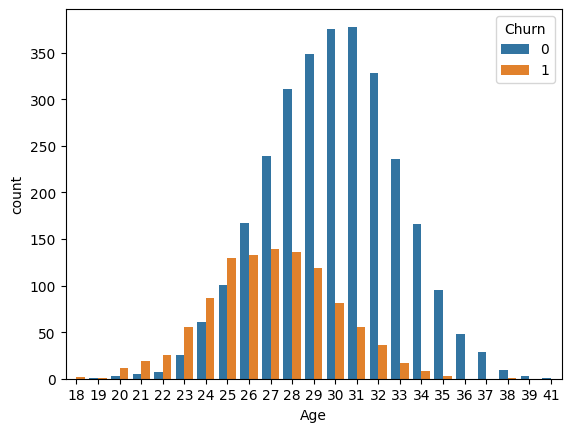

In [9]:
# Визуализация по возрасту клиентов
sns.countplot(x="Age", hue="Churn", data=data)

Чаще всего уходят клиенты в возрасте 25-29 лет

Создадим признак возрастных групп и определим, в каких группах более склонны к оттоку

<Axes: xlabel='age_group', ylabel='count'>

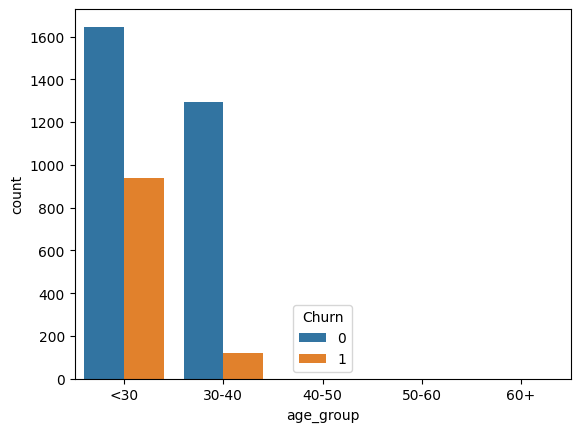

In [10]:
# Для создания категорий используем метод cut()
data['age_group'] = pd.cut(data.Age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])
sns.countplot(x="age_group", hue="Churn", data=data)

В первой возрастной группе (до 30 лет) склонны к оттоку, т.е. молодые клиенты уходят чаще

<Axes: xlabel='Month_to_end_contract', ylabel='count'>

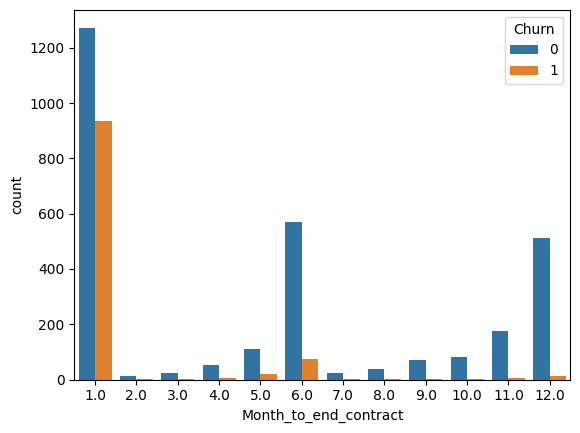

In [11]:
# Визуализация по кол-ву месяцев до окончания текущего действующего абонемента
sns.countplot(x="Month_to_end_contract", hue="Churn", data=data)

Клиенты, у которых остался 1 месяц посещения уходят чаще до истечения срока абонемента

<Axes: xlabel='Lifetime', ylabel='count'>

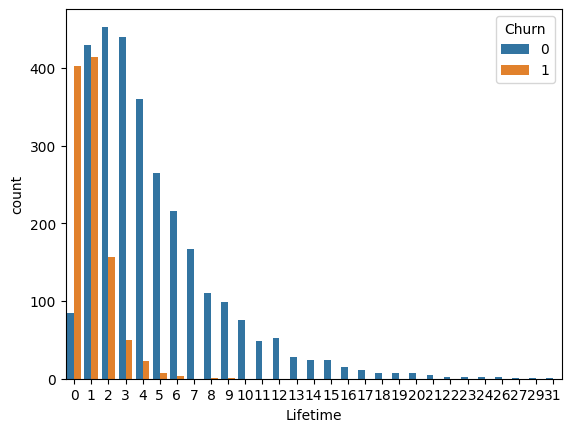

In [12]:
# Визуализация по кол-ву месяцев общего посещения фитнес-центра
sns.countplot(x="Lifetime", hue="Churn", data=data)

Клиенты, которые очень редко посещают спортзал соответственно склонны уходить чаще

In [13]:
import plotly.express as px

In [14]:
fig_applicant_income = px.histogram(data, x='Avg_additional_charges_total', 
                                    title='Распределение суммарной выручки от других услуг фитнес-центра')
fig_applicant_income.show()

In [15]:
fig_applicant_income = px.histogram(data, x='Avg_class_frequency_total', 
                                    title='Распределение коэффициента средней частоты посещений в неделю за все время')
fig_applicant_income.show()

In [16]:
fig_applicant_income = px.histogram(data, x='Avg_class_frequency_current_month', 
                                    title='Распределение коэффициента средней частоты посещений в неделю за прошлый месяц')
fig_applicant_income.show()

Далее разделим базу данных на группы для построения диаграмм

In [17]:
# Создание отдельной базы данных для ушедших клиентов
df_churn = data.query('Churn==1').drop(['Churn'], axis = 1) 
df_churn.shape

(1061, 14)

In [18]:
#  оставшихся клиентов
df_stayed = data.query('Churn!=1').drop(['Churn'], axis = 1) 
df_stayed.shape

(2939, 14)

In [19]:
# Создание отдельной базы данных для бинарных категорий
df_categorical = data[['gender', 'Age','Near_Location', 'Partner', 'Promo_friends', 'Phone',
                       'Group_visits','Month_to_end_contract','Lifetime', 'Churn']]

In [20]:
# Добавление столбца для подсчета
df_categorical.insert(0, "count", 1)

In [21]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [22]:
# Переименование категорий
df_categorical['gender'] = df_categorical['gender'].replace(to_replace=0, value ="Ж").replace(to_replace=1, value ="М")
df_categorical['Near_Location'] = df_categorical['Near_Location'].replace(to_replace=0, value ="ДАЛЕКО").replace(to_replace=1, value ="БЛИЗКО")
df_categorical['Partner'] = df_categorical['Partner'].replace(to_replace=0, value ="НЕПАРТНЁР").replace(to_replace=1, value ="ПАРТНЁР")
df_categorical['Churn'] = df_categorical['Churn'].replace(to_replace=0, value ="ОСТАЛСЯ").replace(to_replace=1, value ="УШЁЛ")
df_categorical['Promo_friends'] = df_categorical['Promo_friends'].replace(to_replace=0, value ="ОДИН").replace(to_replace=1, value ="ПРИВЁЛ ДРУГ")
df_categorical['Phone'] = df_categorical['Phone'].replace(to_replace=0, value ="НЕТ ТЕЛЕФОНА").replace(to_replace=1, value ="ЕСТЬ ТЕЛЕФОН")
df_categorical['Group_visits'] = df_categorical['Group_visits'].replace(to_replace=0, value ="НЕ ПОСЕЩАЕТ ГРУППОВЫЕ ТРЕНИРОВКИ").replace(
    to_replace=1, value ="ПОСЕЩАЕТ ГРУППОВЫЕ ТРЕНИРОВКИ")

In [23]:
# Отдельная база данных для гистограмм
df_hist = data[['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']]

In [24]:
import matplotlib.pyplot as plt

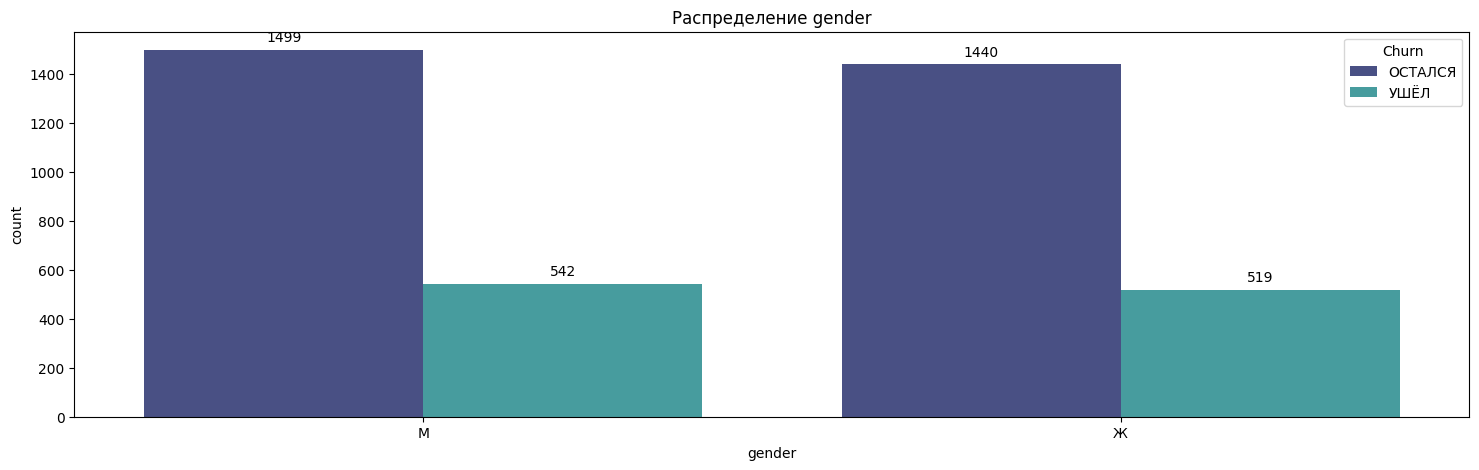

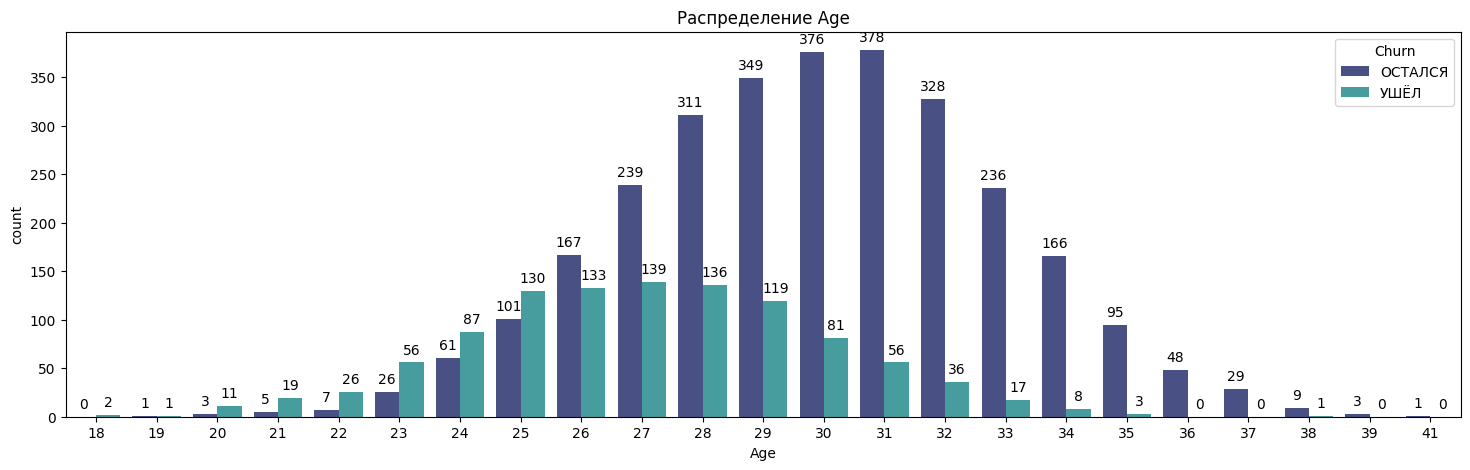

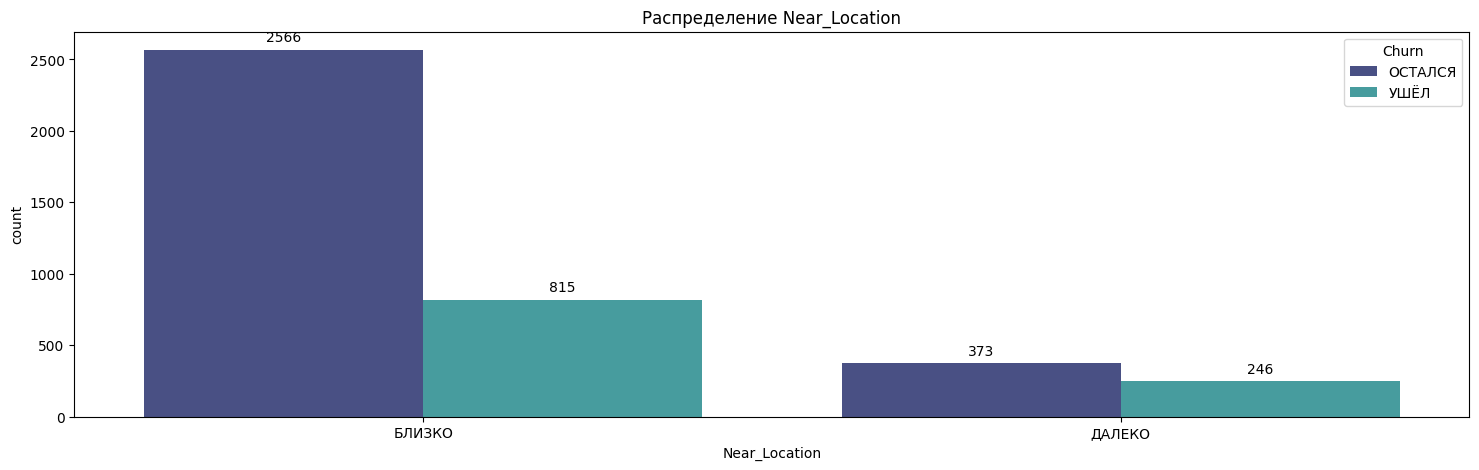

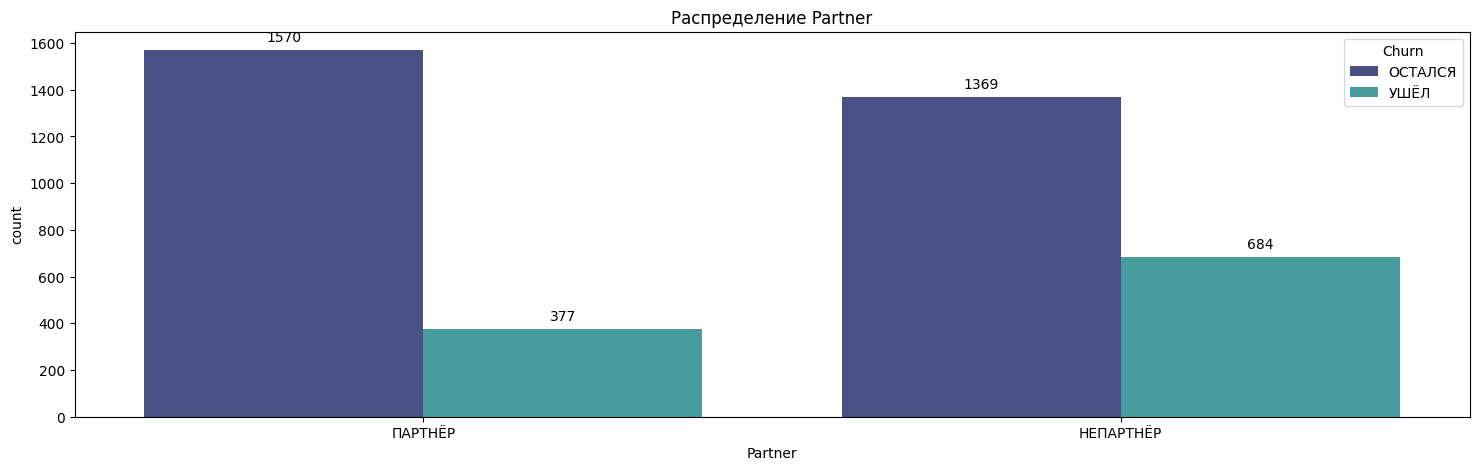

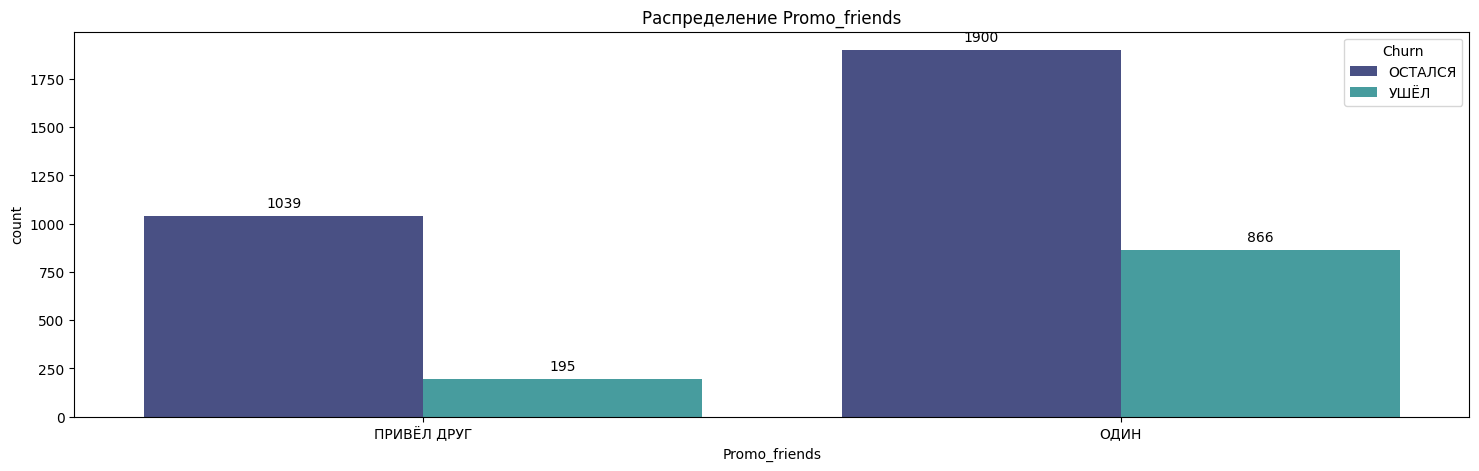

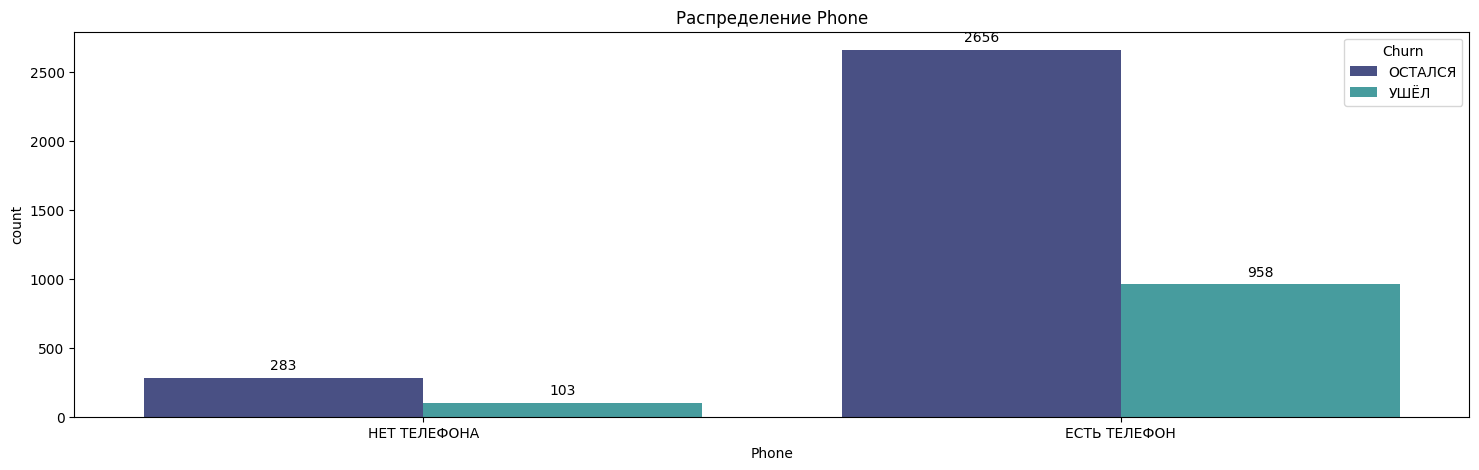

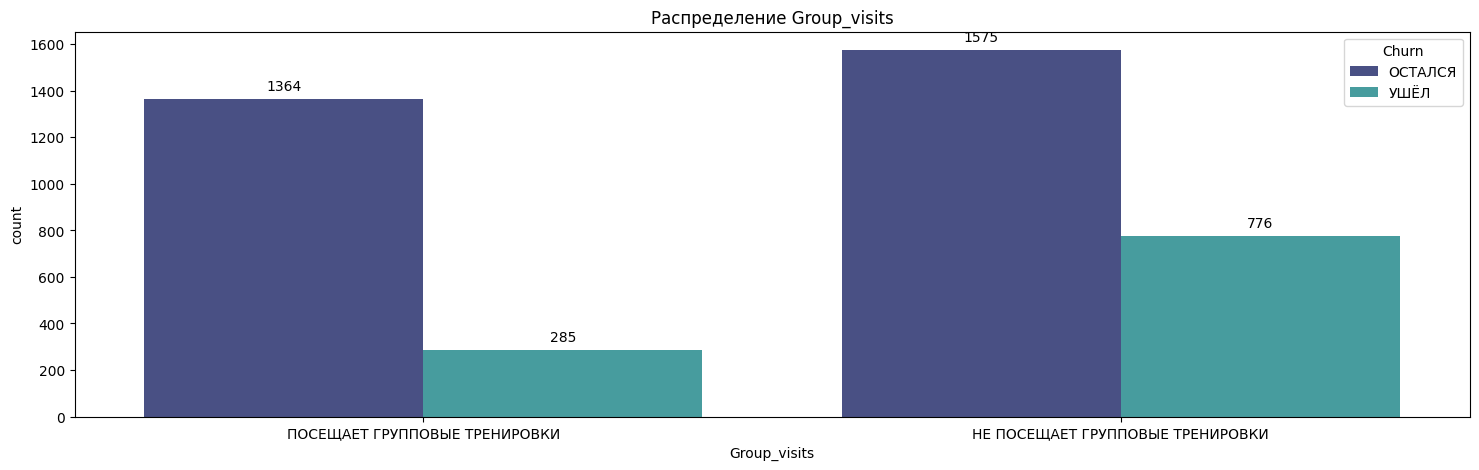

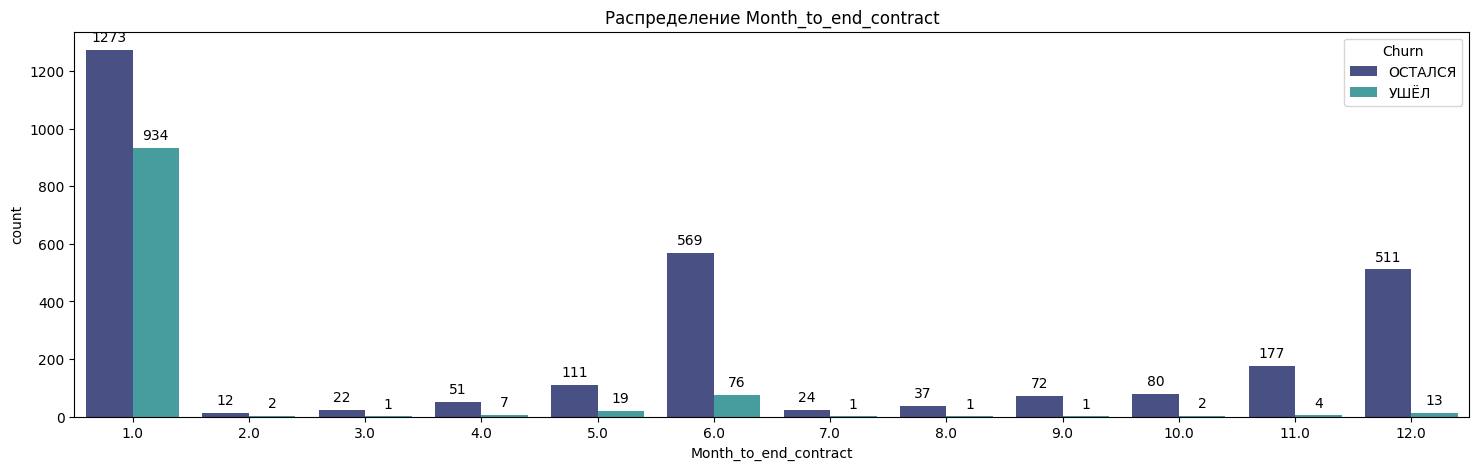

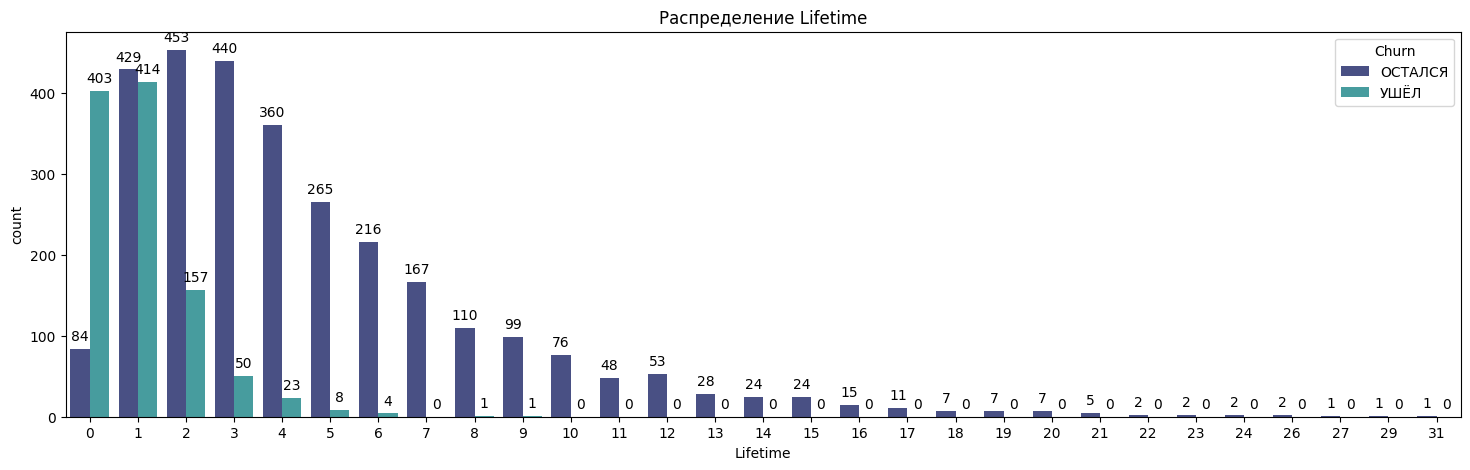

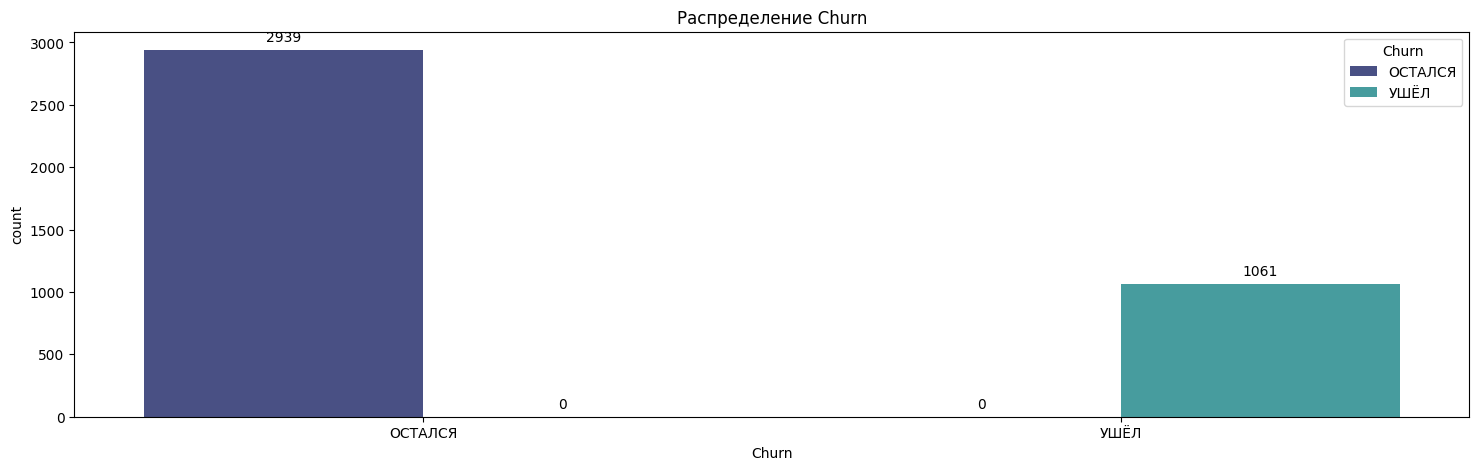

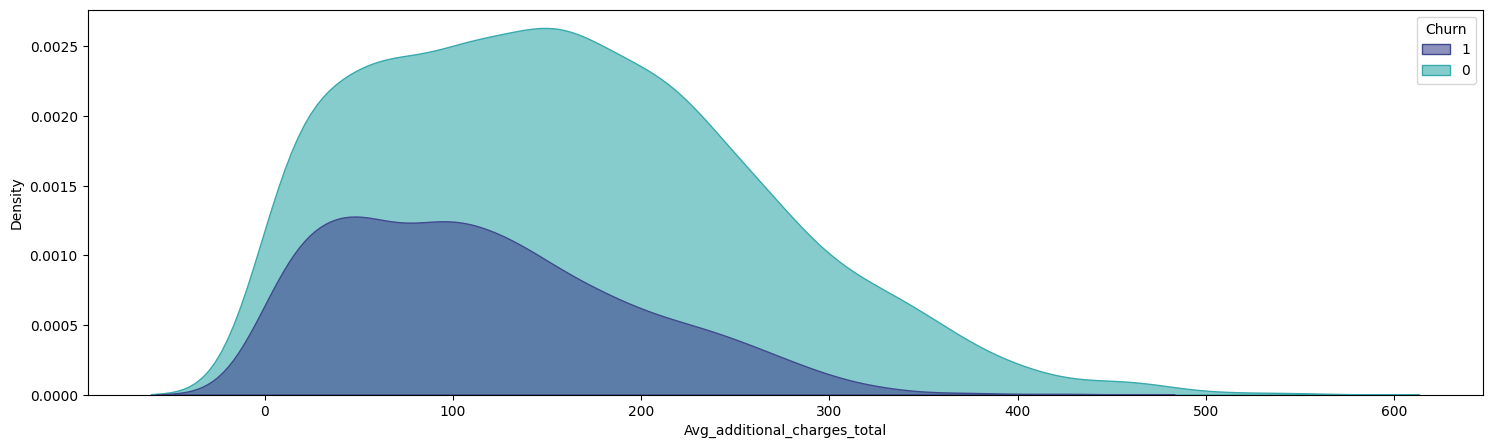

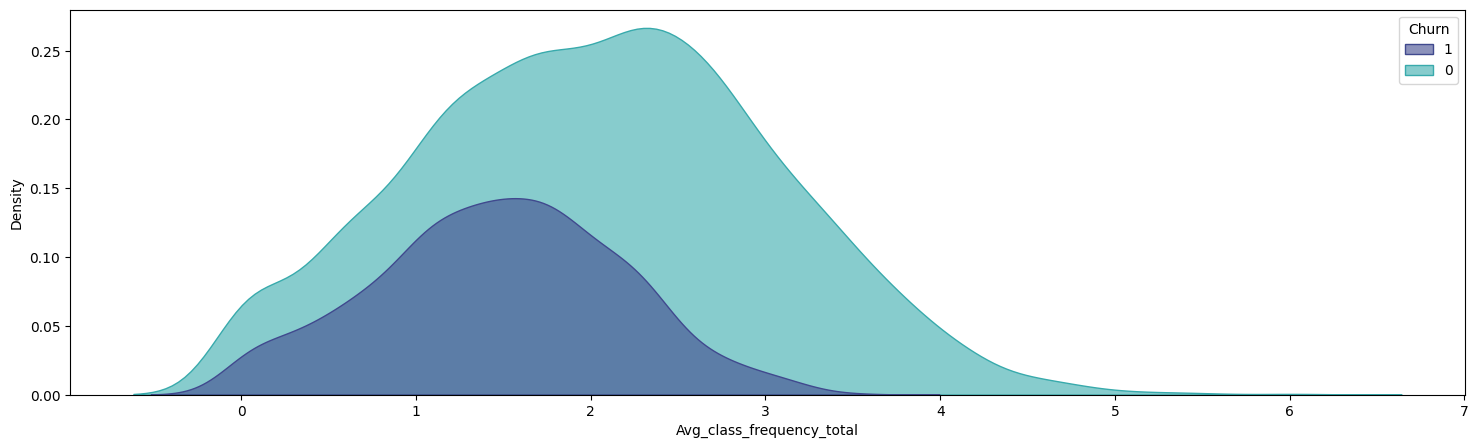

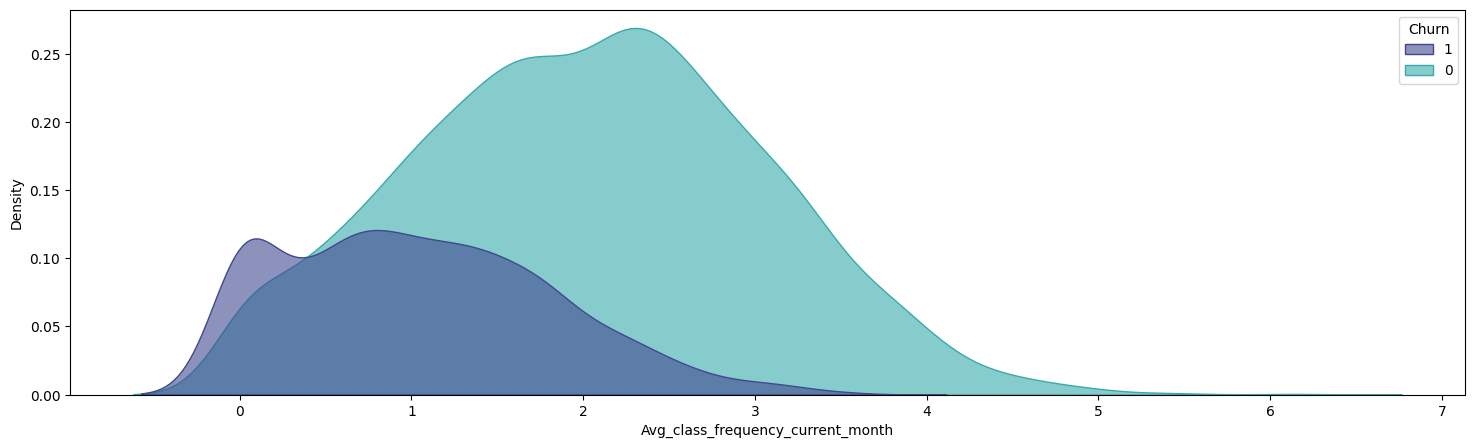

In [25]:
# Визуализация
parameters = ['gender', 'Age', 'Near_Location', 'Partner',
              'Promo_friends', 'Phone', 'Group_visits', 'Month_to_end_contract', 'Lifetime', 'Churn'] # параметры бинарных признаков
parameters_dis = ['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'] # параметры дискретных признаков

for x in parameters:
    plt.figure(figsize=(18,5))
    ax = sns.barplot(x=x, y="count", data=df_categorical, hue='Churn', estimator=sum, palette="mako") 
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    plt.title('Распределение {}'.format(x))        
    plt.show()
            
for x in parameters_dis:
    plt.figure(figsize=(18,5))
    sns.kdeplot(data=df_hist, x=x, hue="Churn", hue_order=[1,0], alpha = 0.6 , palette="mako", fill=True)       
    plt.show()

### **Вывод:**

* Количество мужчин немного больше, чем женщин, уровень оттока одинаков независимо от пола.
* Средние 50% клиентов находятся в возрасте от 27 до 31 года, более молодые клиенты уходят чаще. Начиная с возраста 28-29 лет и выше процент оставшихся клиентов больше, чем ушедших.
* Те, кто живет дальше уходят чаще.
* Аналогично, когда клиенты являются сотрудниками компании-партнера, они ходят реже.
* Количество клиентов, которых привели в спортзал друзья, почти в два раза меньше, чем тех, кто пришел один. Но уровень оттока среди тех, у кого есть друзья, намного ниже.
* В основном клиенты склонны делиться контактной информацией со своим спортзалом; уровень оттока среди тех, у кого нет контактной информации, ожидаемо выше.
* Клиенты, которые не посещают групповые занятия, уходят чаще.
* Как правило, самый высокий уровень оттока наблюдается среди тех, у кого до окончания контракта остался 1 месяц. Следующие популярные волны оттока: 6 месяцев, 5 месяцев и 12 месяцев (сразу после подписания контракта) до окончания контракта.
* Средний уровень расходов ниже среди тех, кто уходит; те, кто остается, как правило, тратят больше на дополнительные услуги спортзала: личный тренер, кафе, спортивные товары, спа-услуги и т. п.
* Средние 50% клиентов тратят от 69 до 211 долларов США в течение срока действия контракта. Только 1% клиентов тратят более 400 долларов США.
* Чем выше частота посещений, тем меньше клиентов уходит.

### Обратим внимание на выбросы, чтобы не встретить аномальных данных

In [26]:
fig_income = px.box(data, x='Churn', 
                    y='Age',
                    color="Churn", 
                    title='Возраст')
fig_income.show()

Возраст пользователей варьируется от 18 до 41 года. Средние 50% пользователей находятся в возрасте от 27 до 31 года.

Не более 1% пользователей старше 37 лет. Таким образом, пользователи старше 37 лет номинально являются выбросами для нашего распределения, но мы этот факт учитывать не будем.

In [27]:
fig_income = px.box(data, x='Churn', 
                    y='Avg_additional_charges_total',
                    color="Churn", 
                    title='Суммарная выручка')
fig_income.show()

Средние 50% клиентов тратят от 69 до 211 долларов США в течение срока действия контракта. Только 1% клиентов тратят более 400 долларов США.

In [28]:
fig_income = px.box(data, x='Churn', 
                    y='Avg_class_frequency_total',
                    color="Churn", 
                    title='Общий коэффициент среднего посещения')
fig_income.show()

In [29]:
fig_income = px.box(data, x='Churn', 
                    y='Avg_class_frequency_current_month',
                    color="Churn", 
                    title='Коэффициент среднего посещения за месяц')
fig_income.show()


Средний показатель: 50% клиентов посещают спортзал 1-2,5 раза в неделю. Только 5% клиентов посещают спортзал более 3 раз в неделю, и только 1% - более 4 раз в неделю.

### Данные в целом распределены нормально, критичных выбросов нет

### **Матрица корреляций**

In [30]:
# Преобразование возрастных групп
from sklearn.preprocessing  import LabelEncoder
from sklearn import preprocessing 
# Обработка с помощью метода LabelEncoder
label_encoder = preprocessing.LabelEncoder() 
data['age_group'] = label_encoder.fit_transform(data['age_group'])
data['age_group'].value_counts() #контрольня проверка

age_group
2    2586
0    1413
1       1
Name: count, dtype: int64

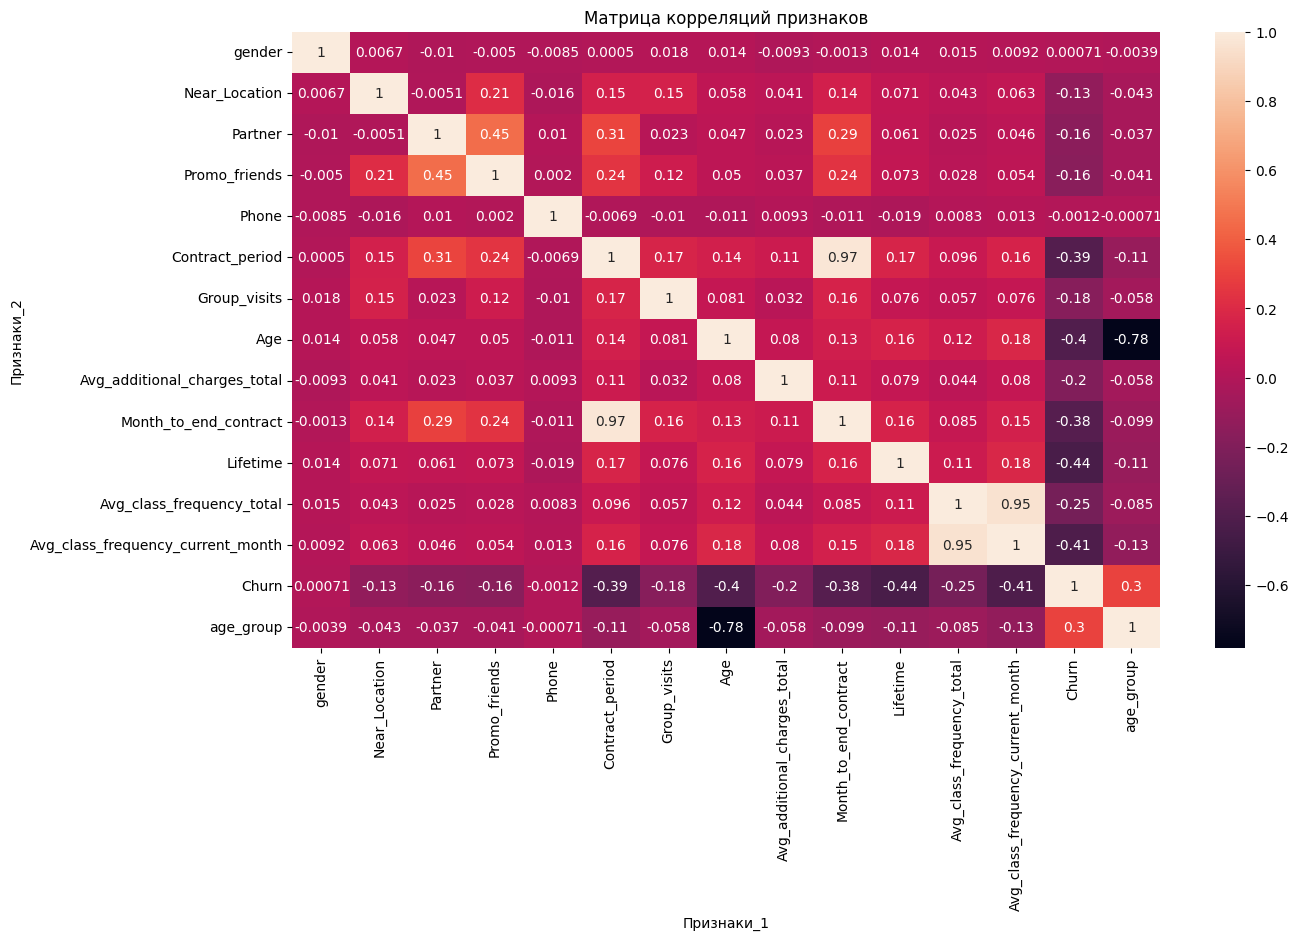

In [31]:
matrix = data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(matrix, annot = True, square=False)
plt.title('Матрица корреляций признаков')
plt.xlabel('Признаки_1') 
plt.ylabel('Признаки_2') 
plt.show()

### **Вывод:**

Матрица показывает, что у нас есть 2 пары взаимосвязанных признаков: 'Month_to_end_contract' с 'Contract_period' и 'Avg_class_frequency_current_month' с 'Avg_class_frequency_current_total'. Один из признаков в каждой паре может быть исключен из модели. Также имеется сильная отрицательная корреляция между признаков возраста клиента ('Age') и созданного признака возрастных групп ('age_group').

Проведём подробный разведывательный анализ набора данных с применением библиотеки D-Tale . Интересная особенность: библиотека предоставляет функцию экспорта кода для каждого графика или элемента анализа в отчёте. Это может оказаться полезным для заказчика.

In [32]:
import dtale
d = dtale.show(data)
d

## 3. Построение модели

In [57]:
from sklearn.model_selection import train_test_split
# Разделение данных на обучающую и тестовую выборки
X = data.drop(['Churn', 'Avg_class_frequency_current_month', 'Contract_period'] , axis = 1) # удаление сильно коррелирующих признаков
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Модель логистической регрессии**

In [58]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
# Обучение модели
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [59]:
# Прогнозирование модели
lr_predict = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score
# Метрики для логистической регрессии
print('Метрики для логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predict)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predict)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predict)))
print('F1: {:.2f}\n'.format(f1_score(y_test, lr_predict)))

Метрики для логистической регрессии:
Accuracy: 0.88
Precision: 0.74
Recall: 0.77
F1: 0.76



### **Модель случайного леса**

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Обучение модели
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Прогнозирование модели
rf_predict = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

In [63]:
# Метрики для случайного леса
print('Метрики для случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predict)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predict)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predict)))
print('F1: {:.2f}\n'.format(f1_score(y_test, rf_predict)))

Метрики для случайного леса:
Accuracy: 0.89
Precision: 0.79
Recall: 0.75
F1: 0.77



### **Вывод:**

Согласно метрикам моделей, модель классификатора случайного леса представляет целевую переменную более точно, поскольку все метрики за исключением ***Recall*** дают более высокие оценки.

## 4. Кластеризация клиентов

In [64]:
from sklearn.preprocessing import StandardScaler
# Стандартизация данных
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

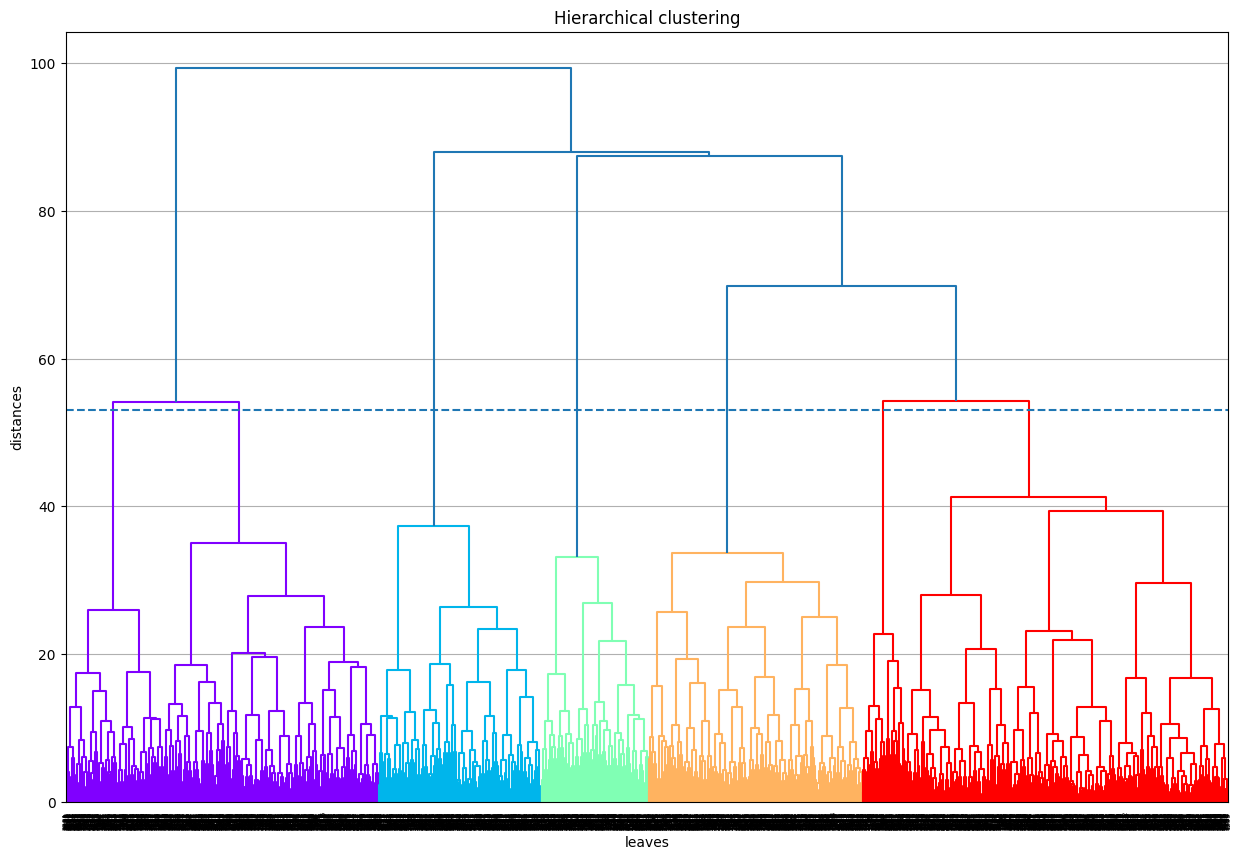

In [65]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib as mpl
from scipy.cluster import hierarchy
from matplotlib.pyplot import cm
# Визуализация модели
linked = linkage(X_scaler, method = 'ward') 

cmap = cm.rainbow(np.linspace(0, 1, 5))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.axhline(linestyle='--', y=53)
plt.grid(axis='y'); plt.xlabel('leaves'); plt.ylabel('distances')
plt.title('Hierarchical clustering')
plt.show()

Дендограмма обрисовала нам 5 кластеров. Попробуем разделить клиентов на 5 кластеров с применением метода K-means.

In [66]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, random_state=42) # устанавливаем количество кластеров равное 5
labels = km.fit_predict(X_scaler)

In [67]:
# Сохраняем метки кластера
data['cluster'] = labels
 
# Рассчитаем статистику средних значений признаков на кластер 
df_clusters = data.groupby(['cluster']).mean().reset_index()
df_clusters

,cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,age_group
0,0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839,1.295337
1,1,0.498195,0.000000,0.485560,0.075812,1.0,2.940433,0.229242,28.657040,137.343334,2.767148,3.009025,1.755739,1.589839,0.404332,1.404332
2,2,0.483627,0.996222,0.910579,0.759446,1.0,7.379093,0.515113,27.583123,154.092953,6.803526,4.516373,1.944648,1.887176,0.152393,2.000000
3,3,0.512129,0.991914,0.511231,0.365678,1.0,5.630728,0.481581,32.680144,156.231167,5.128482,4.324349,2.014844,1.979374,0.076370,0.000898
4,4,0.528187,1.000000,0.176930,0.055507,1.0,2.711188,0.357329,27.127493,138.583914,2.535993,2.872507,1.770253,1.578945,0.457936,2.000000


Таблица наглядно иллюстрирует, что средние значения для большинства признаков различаются между кластерами. Мы построим график распределения признаков для каждого кластера, чтобы сделать его более наглядным.

In [70]:
# С оздадим отдельную базу данных
df = data

In [80]:
df['cluster'].value_counts()

cluster
4    1153
3    1113
2     794
1     554
0     386
Name: count, dtype: int64

In [74]:
# Переименование категорий
df['gender'] = df['gender'].replace(to_replace=0, value ="Ж").replace(to_replace=1, value ="М")
df['Near_Location'] = df['Near_Location'].replace(to_replace=0, value ="ДАЛЕКО").replace(to_replace=1, value ="БЛИЗКО")
df['Partner'] = df['Partner'].replace(to_replace=0, value ="НЕПАРТНЁР").replace(to_replace=1, value ="ПАРТНЁР")
df['Churn'] = df['Churn'].replace(to_replace=0, value ="ОСТАЛСЯ").replace(to_replace=1, value ="УШЁЛ")
df['Promo_friends'] = df['Promo_friends'].replace(to_replace=0, value ="ОДИН").replace(to_replace=1, value ="ПРИВЁЛ ДРУГ")
df['Phone'] = df['Phone'].replace(to_replace=0, value ="НЕТ ТЕЛЕФОНА").replace(to_replace=1, value ="ЕСТЬ ТЕЛЕФОН")
df['Group_visits'] = df['Group_visits'].replace(to_replace=0, value ="НЕ ПОСЕЩАЕТ ГРУППОВЫЕ ТРЕНИРОВКИ").replace(
    to_replace=1, value ="ПОСЕЩАЕТ ГРУППОВЫЕ ТРЕНИРОВКИ")
# Добавление столбца для подсчета
df.insert(0, "count", 1)

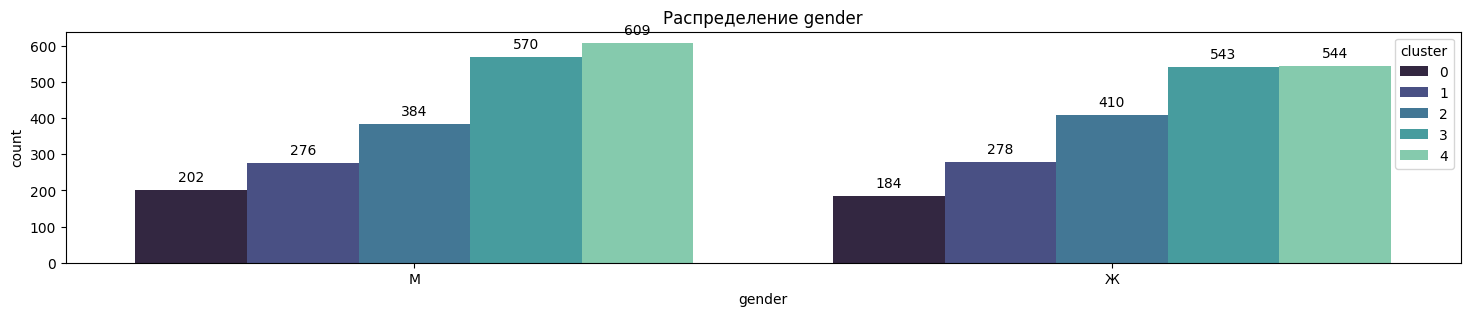

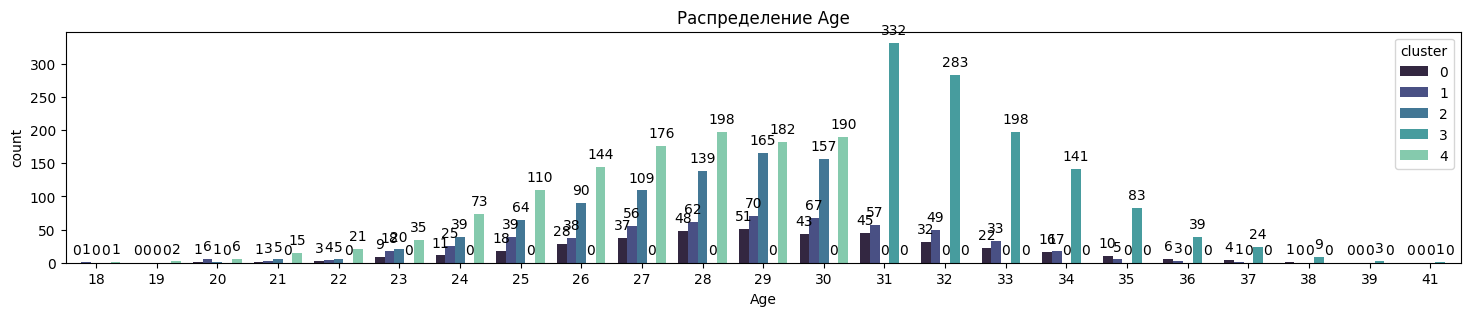

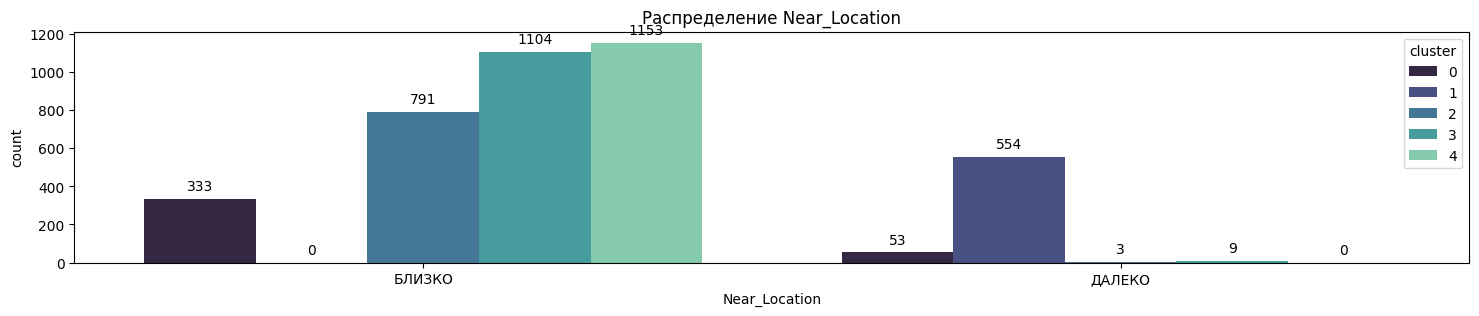

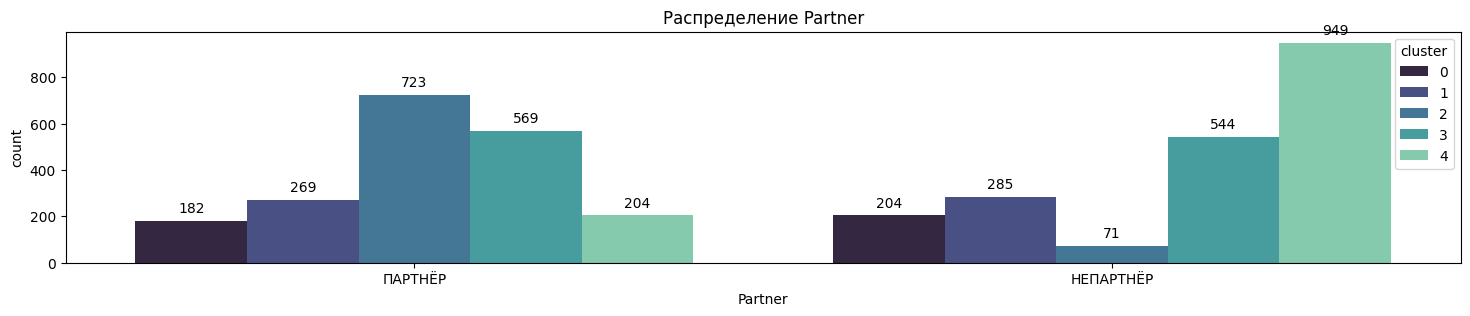

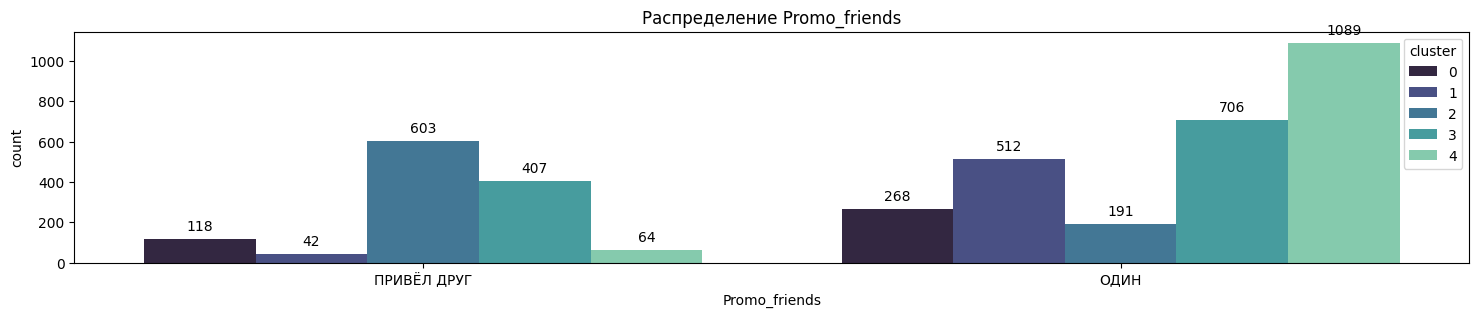

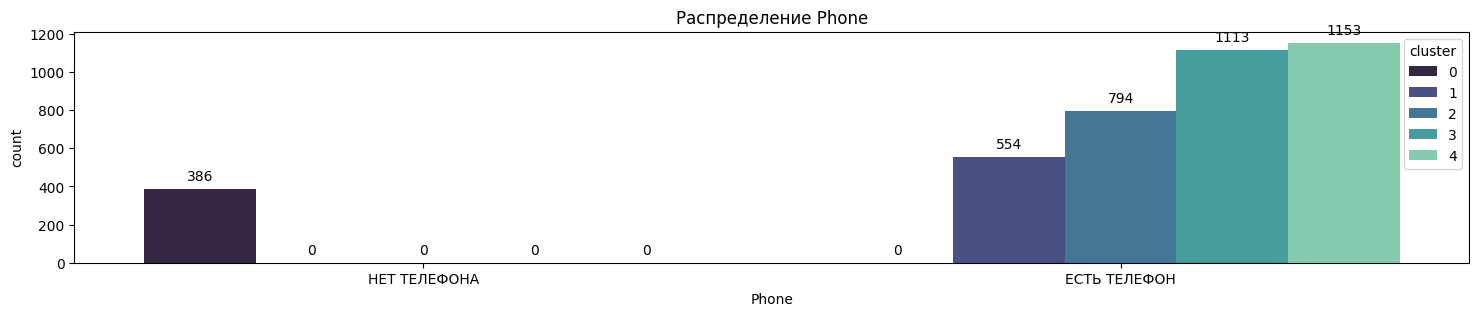

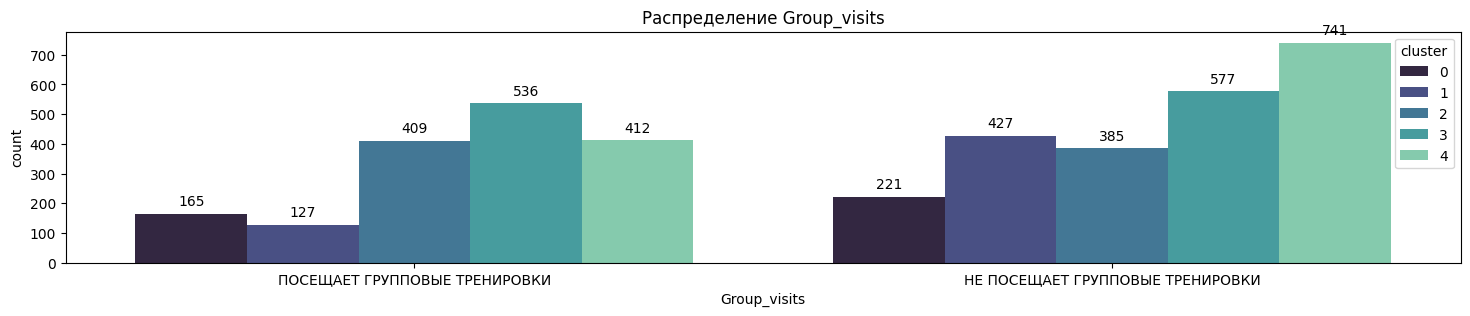

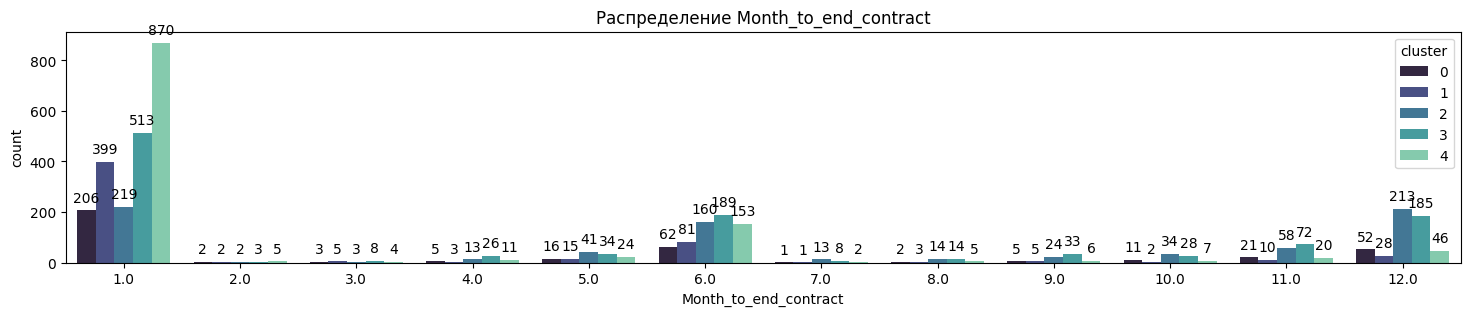

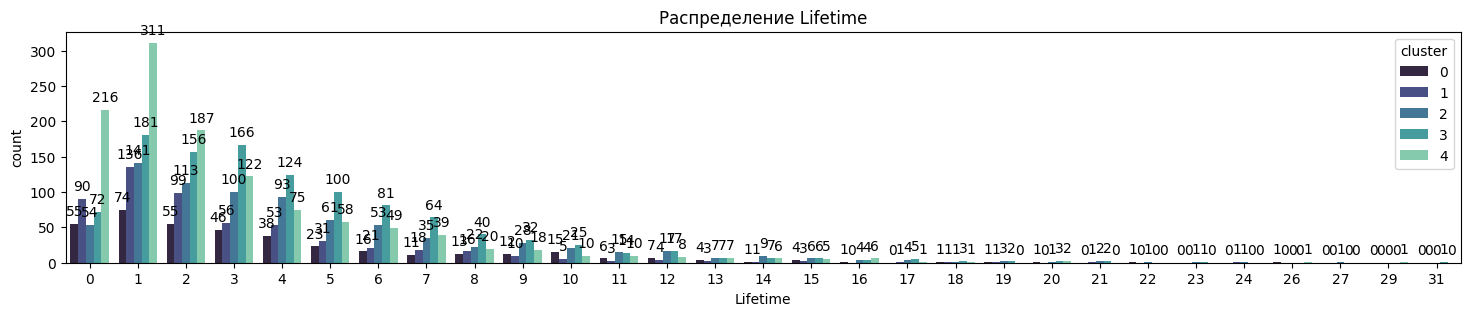

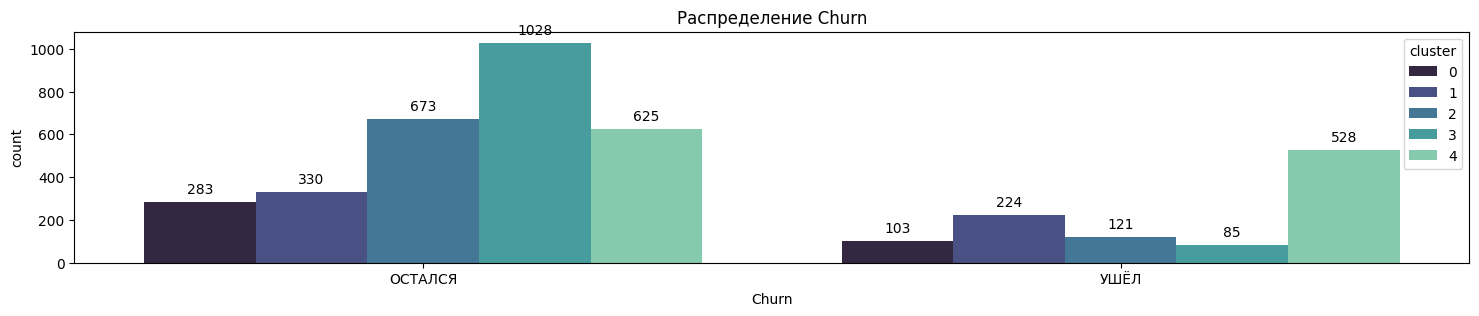

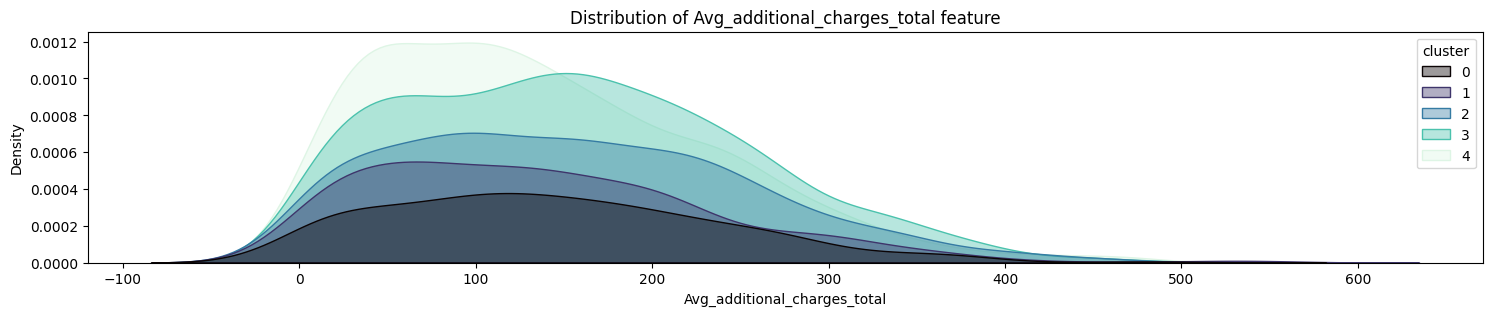

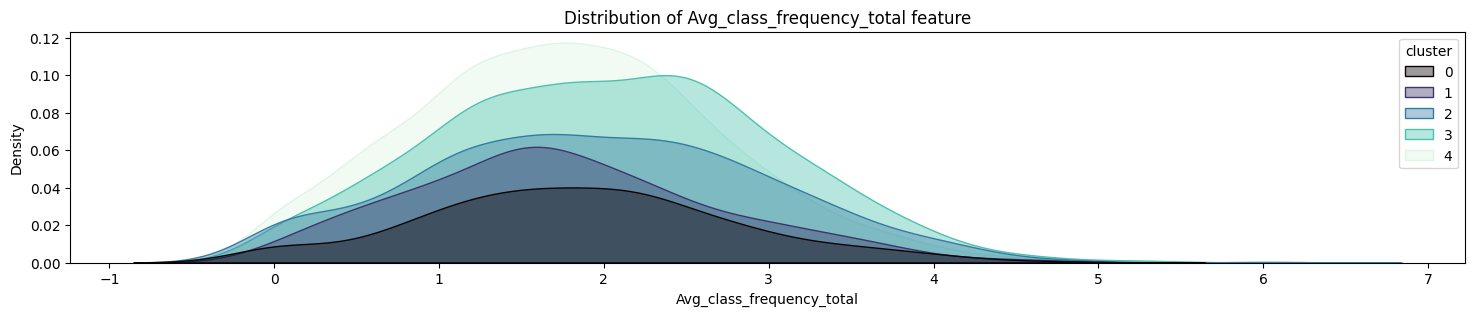

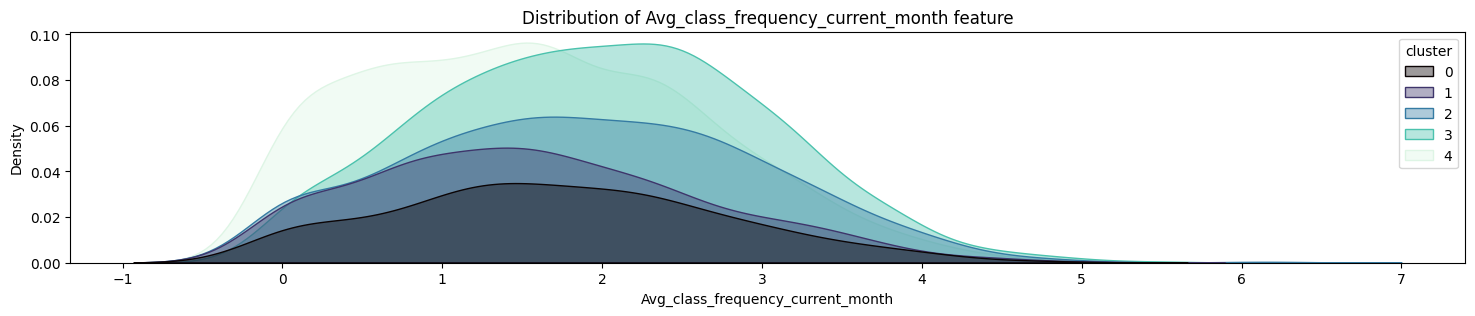

2024-09-05 22:48:04,007 - INFO     - Executing shutdown due to inactivity...
2024-09-05 22:48:08,082 - INFO     - Executing shutdown...
2024-09-05 22:48:08,082 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [ ]:
# Визуализация
parameters_cat = ['gender', 'Age', 'Near_Location', 'Partner',
              'Promo_friends', 'Phone', 'Group_visits', 'Month_to_end_contract', 'Lifetime', 'Churn'] # бинарные признаки
parameters_dis = ['Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'] # дискретные признаки

for x in parameters_cat:
    plt.figure(figsize=(18,3))
    ax = sns.barplot(x=x, y="count", data=df, hue='cluster', estimator=sum, palette="mako") 
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    plt.title('Распределение {}'.format(x))        
    plt.show()
    
for x in parameters_dis:
    plt.figure(figsize=(18,3))
    sns.kdeplot(data=df, x=x, hue="cluster", alpha = 0.4 , palette="mako", fill=True)
    plt.title('Distribution of {} feature'.format(x))
    plt.show()

### **Вывод:**

* кластеры по половой принадлежности разделились примерно одинаково;
* клиенты по возрасу распределены равномерно по кластерам;
* в кластер 1 входят только клиенты, которые живут далеко; в кластер 4 входят только клиенты, которые живут рядом со спортзалом;
* кластер 4 не включает клиентов, которые являются партнерами спортзала и попали туда через друзей;
* кластер 0 содержит клиентов, не оставивших свой номер телефона спортзалу; такие клиенты не включены в другие кластеры;
* предпочтения по групповым тренировкам практически равномерно распределены среди всех кластеров;
* клиенты, которые остаются и уходят равномерно распределены между кластерами;
* кластер 0 — самый малочисленный, а кластер 4 — самый насыщенный.

## **Скорость оттока для кластеров**

Рассчитаем и визуализируем показатель оттока для каждого кластера

In [78]:
# Создание таблицы для расчета скорости
df_clusters_churn = df_clusters[['cluster','Churn']].sort_values(by='Churn', ascending=True).reset_index(drop=True)
df_clusters_churn['cluster'] = df_clusters_churn['cluster'].astype(str)
df_clusters_churn['Churn'] = df_clusters_churn['Churn']*100
df_clusters_churn

,cluster,Churn
0,3,7.637017
1,2,15.239295
2,0,26.683938
3,1,40.433213
4,4,45.793582


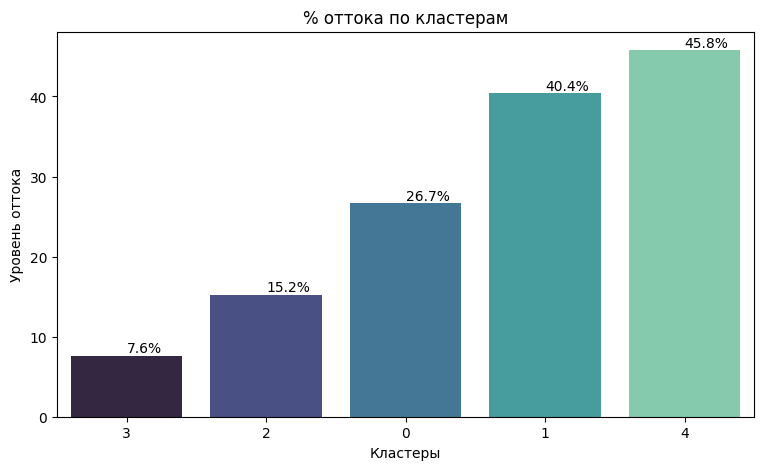

In [97]:
# plotting barh chart 
plt.figure(figsize=(9,5))
ax = sns.barplot(x=df_clusters_churn.cluster, y=df_clusters_churn.Churn, palette='mako') 
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Кластеры", ylabel='Уровень оттока')

ax.set_xticklabels(df_clusters_churn.cluster)
for item in ax.get_xticklabels(): item.set_rotation(0)
for i, v in enumerate(df_clusters_churn["Churn"].items()):        
    ax.text(i ,v[1], "{:.1f}%".format(v[1]), color='k', va ='bottom', rotation=0)

plt.title('% оттока по кластерам')
plt.show()

### **Вывод:**

Самый высокий уровень оттока у кластера 4 (45% клиентов уходят), кластеры 2 и 3 имеют самый низкий уровень оттока.

Модель Случайного леса объединила 5 групп, но мы видим, что по уровню оттока только 4 имеют существенные различия. Таким образом, формируя маркетинговую стратегию, мы можем разделить её на 4 общие группы.

# **Общие выводы и рекомендации**

В ходе предварительной обработки данных мы изучили датасет, включающий 4000 записей и 13 признаков.

1. Проверили данные на наличие пропущенных значений и дубликатов.

2. Установили, что:
* возраст пользователей варьируется от 18 до 41 года. Средние 50% пользователей находятся в возрасте от 27 до 31 года;
* не более 1% пользователей старше 37 лет;
* средние 50% клиентов тратят от 69 до 211 долларов США в течение срока действия контракта, только 1% клиентов тратят более 400 долларов США;
* средние 50% клиентов посещают спортзал 1-2,5 раза в неделю. Только 5% клиентов посещают спортзал более 3 раз в неделю, и только 1% - более 4 раз в неделю.

3. Выяснили, что к оотоку склонны следующие категории клиентов:
* те, кто живет дальше от спортзала;
* молодые (в среднем 27 лет);
* кто не является сотрудниками партнеров по спортзалу;
* приходили одни, покупали краткосрочные контракты, не посещали групповые тренировки;
* не пользовались дополнительными услугами в спортзале;
* у кого до окончания контракта осталось менее 2 месяцев и посещают спортзал только 1-2 раза в неделю.

4. Определили корреляцию между признаками и выяснили, что у нас есть 2 пары взаимно коррелирующих признаков: 'Month_to_end_contract' с 'Contract_period' и 'Avg_class_frequency_current_month' с 'Avg_class_frequency_current_total'. Один из признаков в каждой паре был удалён для построения и обучения модели с целью выдачи прогнозов по оттоку.

5. Использовали два алгоритма для создания модели с использованием логистической регрессии и случайного леса.Метрики показали, что вторая модель лучше представляет целевую переменную.

6. Определили 5 кластеров и рассмотрели распределение признаков для каждого кластера.
Что касается показателя оттока как целевого значения, он четко различается между 4 из 5 кластеров. Самый высокий показатель оттока у кластера 4 (45,8% клиентов уходят), самый низкий показатель оттока у кластера 3 (7,6% клиентов покидают спортзалы).

7. Общие рекомендации:

Основные маркетинговые усилия должны быть направлены на возрастную группу 27 - 31 год (это средние 50% клиентов). Только 5% клиентов старше 34 лет.

Дополнительные маркетинговые усилия могут быть направлены на создание дополнительной ниши и формирование спроса среди тех групп потенциальных клиентов, которые не входят в среднюю половину текущих клиентов:
* 18-27 лет,
* старше 34 лет.

Поскольку самый высокий уровень оттока клиентов наблюдается среди тех, у кого до окончания контракта остался 1 месяц, следует направлять клиентам дополнительные индивидуальные предложения за 2–1,5 месяца до окончания контракта.
А за 12 месяцев до окончания контракта (сразу после его подписания) фитнес-центр может предложить клиенту что-то, что поможет ему помочь в его спортивных целях:
* бесплатное индивидуальное занятие с инструктором;
* бесплатная консультация специалиста по питанию;
* составление индивидуальной программы тренировок с инструктором.

За 5 месяцев и до окончания срока действия контракта тренажерный зал может предложить некоторые бонусы для повышения лояльности клиента и мотивации его продолжать заниматься спортом:
* бесплатный сеанс специалиста;
* корректировка индивидуальной программы обучения по результатам предыдущего периода.

Необходимо приложить дополнительные усилия, чтобы побудить людей покупать сопутствующие услуги спортзала: кафе, спортивные товары, косметику, массаж и т. п. По мере того, как люди получают больше положительного опыта, они все больше ассоциируют себя с спортзалом, с определенным образом жизни и, в конечном итоге, меньше отказываются от посещения.

Поскольку чем чаще посещения, тем меньше клиентов, фитнес-клубу следует поощрять клиентов не пропускать тренировки: отправлять напоминания/звонки, устанавливать личные контакты с инструкторами, предлагать бонусную систему за каждый месяц без пропуска занятий.

Поскольку те, кто пришел с друзьями, реже отказываются от услуг, отделу маркетинга следует запустить программы лояльности и кампании «приходи с другом».